In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("Brain_GSE50161.csv")
defaulter_df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (130, 54677)


In [5]:
print("Target variable frequency distribution : \n", defaulter_df["type"].value_counts())

Target variable frequency distribution : 
 ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: type, dtype: int64


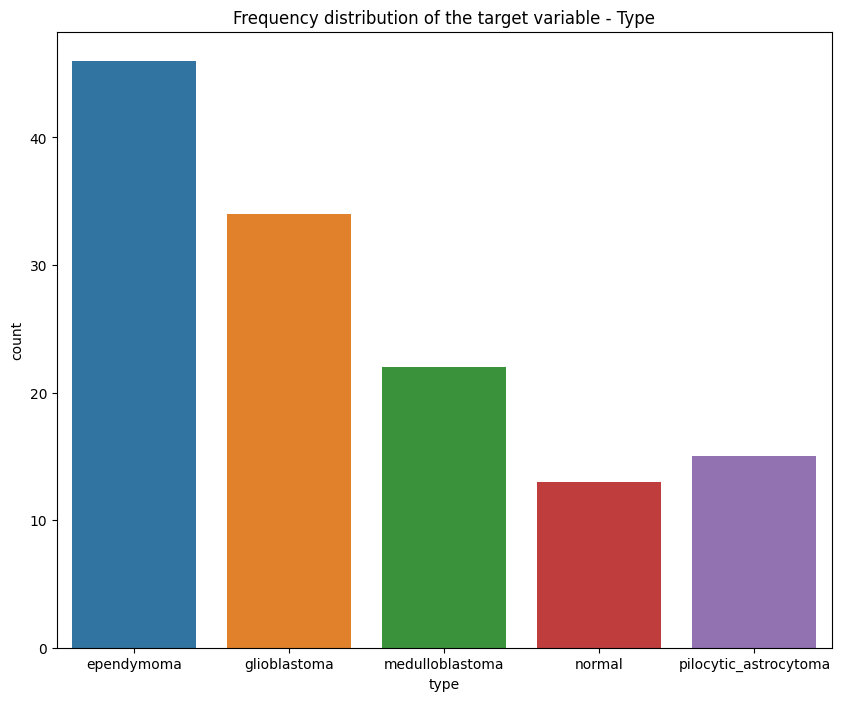

In [65]:
plt.figure(figsize=(10, 8))
sns.countplot(data=defaulter_df, x="type")
plt.title("Frequency distribution of the target variable - Type")
plt.show()

In [7]:
X = defaulter_df[["1007_s_at", "1053_at"]]
y = defaulter_df["type"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  104
Size of test data :  26


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed


array([[ 0.64491396,  0.74757875],
       [ 0.72242018,  0.64551829],
       [ 0.83790112,  0.50021006],
       [ 0.77105342,  0.34421979],
       [ 0.82508144,  0.46261997],
       [ 0.81206929,  0.45129481],
       [ 0.88503001,  0.57701133],
       [ 0.35371532,  0.11129223],
       [ 0.23428975,  0.63174312],
       [ 0.78214228,  0.44277809],
       [ 0.22095209,  0.51975839],
       [ 0.77920038,  0.28729649],
       [ 0.56719711,  0.8589369 ],
       [ 0.69847229,  0.53150113],
       [-0.03497508,  0.80025459],
       [ 0.22369545,  0.69304523],
       [ 0.46068604,  0.54430729],
       [-0.10410887,  0.74996014],
       [ 0.42948982,  0.47645404],
       [ 0.33928165,  0.45237546],
       [ 0.75662347,  0.57548559],
       [ 0.76822146,  0.48741863],
       [ 0.86281597,  0.44323647],
       [ 0.72579305,  0.23064642],
       [ 0.73408232,  0.46052212],
       [ 0.68061091,  0.43566536]])

In [15]:
X_train["1007_s_at_normalized"] = train_transformed[:,0]
X_train["1053_at_normalized"] = train_transformed[:,1]
X_train.head()

,1007_s_at,1053_at,1007_s_at_normalized,1053_at_normalized
70,12.381536,9.282545,0.598007,0.649360
78,12.765997,9.581127,0.719308,0.722397
47,12.111837,9.909101,0.512914,0.802623
0,12.498150,7.604868,0.634800,0.238982
12,12.545334,8.413482,0.649687,0.436778


In [16]:
X_test["1007_s_at_normalized"] = transformed[:,0]
X_test["1053_at_normalized"] = transformed[:,1]
X_test.head()

,1007_s_at,1053_at,1007_s_at_normalized,1053_at_normalized
55,12.530207,9.684074,0.644914,0.747579
40,12.775860,9.266838,0.722420,0.645518
19,13.141872,8.672800,0.837901,0.500210
31,12.930001,8.035092,0.771053,0.344220
115,13.101241,8.519127,0.825081,0.462620


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["1007_s_at","1053_at"]], y_train)
predictions = knn.predict(X_test[["1007_s_at","1053_at"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.6538461538461539

In [19]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["1007_s_at_normalized","1053_at_normalized"]], y_train)
predictions = knn.predict(X_test[["1007_s_at_normalized","1053_at_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.6923076923076923

In [24]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [35]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"], index = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"])

,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
ependymoma,1,2,0,0,8
glioblastoma,0,2,0,0,2
medulloblastoma,0,0,7,0,0
normal,0,0,0,1,0
pilocytic_astrocytoma,1,0,0,0,2


In [26]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           ependymoma       0.73      0.73      0.73        11
         glioblastoma       0.38      0.75      0.50         4
      medulloblastoma       1.00      0.86      0.92         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.00      0.00      0.00         3

             accuracy                           0.69        26
            macro avg       0.62      0.67      0.63        26
         weighted avg       0.67      0.69      0.67        26



In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 ependymoma               35
glioblastoma             30
medulloblastoma          15
normal                   12
pilocytic_astrocytoma    12
Name: type, dtype: int64


In [29]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [30]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 ependymoma               12
glioblastoma             12
medulloblastoma          12
normal                   12
pilocytic_astrocytoma    12
Name: type, dtype: int64


In [32]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_under[["1007_s_at_normalized","1053_at_normalized"]], y_train_under)
predictions = knn.predict(X_test[["1007_s_at_normalized","1053_at_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.5

In [34]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"], index = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"])

,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
ependymoma,1,2,0,0,8
glioblastoma,0,2,0,0,2
medulloblastoma,0,0,7,0,0
normal,0,0,0,1,0
pilocytic_astrocytoma,1,0,0,0,2


In [36]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           ependymoma       0.50      0.09      0.15        11
         glioblastoma       0.50      0.50      0.50         4
      medulloblastoma       1.00      1.00      1.00         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.17      0.67      0.27         3

             accuracy                           0.50        26
            macro avg       0.63      0.65      0.58        26
         weighted avg       0.62      0.50      0.48        26



In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
print("Before oversampling: \n", y_train.value_counts())

Before oversampling: 
 ependymoma               35
glioblastoma             30
medulloblastoma          15
normal                   12
pilocytic_astrocytoma    12
Name: type, dtype: int64


In [39]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [40]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 glioblastoma             35
ependymoma               35
normal                   35
medulloblastoma          35
pilocytic_astrocytoma    35
Name: type, dtype: int64


In [41]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_over[["1007_s_at_normalized","1053_at_normalized"]], y_train_over)
predictions = knn.predict(X_test[["1007_s_at_normalized","1053_at_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.46153846153846156

In [42]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"], index = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"])

,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
ependymoma,2,2,0,0,7
glioblastoma,1,2,0,0,1
medulloblastoma,0,1,6,0,0
normal,0,0,0,1,0
pilocytic_astrocytoma,2,0,0,0,1


In [43]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           ependymoma       0.40      0.18      0.25        11
         glioblastoma       0.40      0.50      0.44         4
      medulloblastoma       1.00      0.86      0.92         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.11      0.33      0.17         3

             accuracy                           0.46        26
            macro avg       0.58      0.57      0.56        26
         weighted avg       0.55      0.46      0.48        26



In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 ependymoma               35
glioblastoma             30
medulloblastoma          15
normal                   12
pilocytic_astrocytoma    12
Name: type, dtype: int64


In [46]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [47]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 glioblastoma             35
ependymoma               35
normal                   35
medulloblastoma          35
pilocytic_astrocytoma    35
Name: type, dtype: int64


In [48]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_smote[["1007_s_at_normalized","1053_at_normalized"]], y_train_smote)
predictions = knn.predict(X_test[["1007_s_at_normalized","1053_at_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.5769230769230769

In [49]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"], index = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"])

,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
ependymoma,4,2,0,0,5
glioblastoma,0,2,0,0,2
medulloblastoma,0,1,6,0,0
normal,0,0,0,1,0
pilocytic_astrocytoma,1,0,0,0,2


In [50]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           ependymoma       0.80      0.36      0.50        11
         glioblastoma       0.40      0.50      0.44         4
      medulloblastoma       1.00      0.86      0.92         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.22      0.67      0.33         3

             accuracy                           0.58        26
            macro avg       0.68      0.68      0.64        26
         weighted avg       0.73      0.58      0.61        26



In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_clf = LogisticRegression()
log_clf.fit(X_train[["1007_s_at_normalized","1053_at_normalized"]], y_train)
predictions = log_clf.predict(X_test[["1007_s_at_normalized","1053_at_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.6153846153846154

In [54]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"], index = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"])

,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
ependymoma,10,1,0,0,0
glioblastoma,2,2,0,0,0
medulloblastoma,1,3,3,0,0
normal,0,0,0,1,0
pilocytic_astrocytoma,3,0,0,0,0


In [55]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           ependymoma       0.62      0.91      0.74        11
         glioblastoma       0.33      0.50      0.40         4
      medulloblastoma       1.00      0.43      0.60         7
               normal       1.00      1.00      1.00         1
pilocytic_astrocytoma       0.00      0.00      0.00         3

             accuracy                           0.62        26
            macro avg       0.59      0.57      0.55        26
         weighted avg       0.62      0.62      0.57        26



In [56]:
log_clf_balanced = LogisticRegression(class_weight = "balanced")
log_clf_balanced.fit(X_train[["1007_s_at_normalized","1053_at_normalized"]], y_train)
predictions = log_clf_balanced.predict(X_test[["1007_s_at_normalized","1053_at_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.46153846153846156

In [57]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"], index = ["ependymoma", "glioblastoma","medulloblastoma","normal","pilocytic_astrocytoma"])

,ependymoma,glioblastoma,medulloblastoma,normal,pilocytic_astrocytoma
ependymoma,1,2,0,0,8
glioblastoma,0,2,0,0,2
medulloblastoma,0,0,5,2,0
normal,0,0,0,1,0
pilocytic_astrocytoma,0,0,0,0,3


In [58]:
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

           ependymoma       1.00      0.09      0.17        11
         glioblastoma       0.50      0.50      0.50         4
      medulloblastoma       1.00      0.71      0.83         7
               normal       0.33      1.00      0.50         1
pilocytic_astrocytoma       0.23      1.00      0.38         3

             accuracy                           0.46        26
            macro avg       0.61      0.66      0.47        26
         weighted avg       0.81      0.46      0.43        26

